<img src='1.JPG'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Big Mart Dataset walkthrough

In [3]:
train=pd.read_csv('Train_UWu5bXk.txt')

# Missing Values

In [4]:
train.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
train.shape

(8523, 12)

In [6]:
a=train.isnull().mean()*100

In [7]:
print(type(a))
a

<class 'pandas.core.series.Series'>


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### There aren’t too many missing values (just 2 variables have them actually). 

#### We can impute the values using appropriate methods, or we can set a threshold of, say 20%, and remove the variable having more than 20% missing values. 

    Let’s look at how this can be done in Python:

In [9]:
variables = train.columns
variable=[]
#print(type(variables))
for i in range(0,12):
    if a[i] <= 20:
        variable.append(variables[i])
        
print(variable)

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


### Imputing missing values

####  impute the missing values in the Item_Weight column using the median value of the known Item_Weight observations. For the Outlet_Size column, we will use the mode of the known Outlet_Size values to impute the missing values:

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
print(train.Outlet_Size.unique())
#print(train.Item_Weight.unique())

['Medium' nan 'High' 'Small']


#### Outlet_Size is categorical, so the imputation will be done using mode
#### Item_weight is continuous, so the imputation will be done using median

In [12]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

### Checking whether imputation has been successfully done or not

#### mean should be zero for all null 

In [13]:
train.isnull().mean()*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

## Now checking for Low Variance filter

* Consider a variable in our dataset where all the observations have the same value, say 1. 
* If we use this variable, do you think it can improve the model we will build? 
* The answer is no, because this variable will have zero variance.

### So, we need to calculate the variance of each numerical variable. 
Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

In [14]:
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

* From above we can see that variance of Item_Visibility is very less as compared to the other variables. 
* We can safely drop this column. 

### Building a low variance filter with threshold of 10%:


In [ ]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i])

In [ ]:
variable

# High Correlation or Multicollinearity Filter

* High correlation between two variables means they have similar trends and are likely to carry similar information. 
* This can bring down the performance of some models drastically (linear and logistic regression models, for instance). 
* We can calculate the correlation between independent numerical variables that are numerical in nature. 
* If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).


### Dropping dependent variable Item_Outlet_Sales and saving remaining variable in a new dataframe

In [15]:
df=train.drop('Item_Outlet_Sales',1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


### We can see that there are no variables having high correlation. If the correlation coefficient between 2 variables is between 0.5-0.6 we should seriously consider dropping one of these 2 variables.

# Random Forest

* Random Forest is one of the most widely used algorithms for feature selection. 
* It comes packaged with in-built feature importance so you don’t need to program that separately. 
* This helps us select a smaller subset of features.

* We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs. pd.get_dummies()
* Dropping the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and thus insignificant

In [16]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df) # Convert categorical variable into dummy/indicator variables. (One Hot Encoding)
model.fit(df,train.Item_Outlet_Sales)

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

### After fitting the model, plot the feature importance graph:


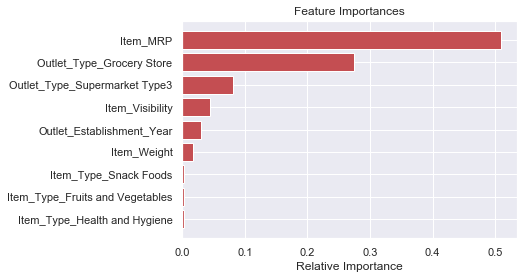

In [17]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Based on above graph we can pick the top-most features to reduce dimensionality of dataset.

# Backward Feature Elimination / Recursive Feature Elimination

Follow the below steps to understand and use the ‘Backward Feature Elimination’ technique:

* First take all the n variables present in our dataset and train the model using them
* Then calculate the performance of the model
* Compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
* Identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
* Repeat this process until no variable can be dropped

### This technique is used while when building Linear or Logistic regression models

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit(df, train.Item_Outlet_Sales)

* Need to specify the algorithm and number of features to select & get back the list of variables obtained from backward feature elimination. 
* To check the ranking of the variables use “rfe.ranking_” command. The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

In [19]:
rfe.ranking_

array([25,  1, 16, 14,  6, 24,  5, 12,  1, 19, 23, 22, 10,  3, 15,  2, 21,
       17,  4, 20,  1,  1, 18,  1,  1,  9, 11,  7, 13, 26,  8,  1,  1,  1,
        1])